In [272]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Block A: Data cleaning & merging

### Users - EDA

In [273]:
users_df=pd.read_csv("SIQ_data_test/users.csv")

In [274]:
print(users_df.shape)
users_df.head()

(5807, 5)


,UserId,Country,DOB,Gender,RegDate
0,1326865,DE,1988-05-04,M,2016-03-24
1,1333278,GB,1971-07-21,M,2016-02-09
2,1336967,GB,1983-07-31,M,2016-01-29
3,1339784,Other,1976-09-21,M,2016-01-21
4,1339829,Other,1981-05-03,F,2016-04-12


Reload with setting some types

In [275]:
users_df=pd.read_csv("SIQ_data_test/users.csv", dtype={'UserId':str, 'Country':str, 'Gender':str}, parse_dates=['DOB','RegDate'])

Sometimes opt for using profiling tools for initial look at data. In this case just look manually at the columns.

#### User Id

In [276]:
print( f"{users_df.UserId.isna().sum():,} missing values for UserId")
print( f"{users_df.UserId.nunique():,} unique values for UserId")
print( f"{users_df.UserId.duplicated().sum():,} duplicate values for UserId")

0 missing values for UserId
5,807 unique values for UserId
0 duplicate values for UserId


#### Country

In [277]:
print( f"{users_df.Country.isna().sum():,} missing values for Country")
print( f"{users_df.Country.nunique():,} unique values for Country")
display(users_df.Country.value_counts(dropna=False))

0 missing values for Country
5 unique values for Country


GB       2489
US       1017
DE        945
Other     889
FR        467
Name: Country, dtype: int64

#### Gender

In [278]:
print( f"{users_df.Gender.isna().sum():,} missing values for Gender")
print( f"{users_df.Gender.nunique():,} unique values for Gender")
display(users_df.Gender.value_counts(dropna=False))

0 missing values for Gender
3 unique values for Gender


M    2909
     1481
F    1417
Name: Gender, dtype: int64

In [279]:
print(f"{(users_df.Gender==' ').sum():,} rows are missing Gender value.")

1,481 rows are missing Gender value.


## Question 1

Please load the users and activity tables into Python.
 - a.	How many variables are in the datasets?
      - There are 4 variables in the user data set: 
                  `Country`, `DOB`, `Gender`, and `RegDate`
      - There are 2 variables in the Activities dataset
                  `Date`, `Revenue`
      - In each file is a common identifier: `UserId`
                 
                  
 - b.	How many observations are in the users datasets?
      - There are 5,807 observations in the User data set. 
      - There are 22,642 observations in the Activities data set (see analysis below).
      


## Question 2

As there are no duplicate UserIds in the dataset, assume that 1 row = 1 user.

* a: There are 2,909 Male users in the dataset.
* b: There are 1,417 Female users in the dataset.
* c: There are 1,481 users missing a value in the dataset.

Assume all missing / ' ' values are M. Correct the column for future analysis.

In [280]:
users_df['Gender_corrected'] = users_df.Gender.apply(lambda s: 'M' if s == ' ' else s)
users_df.Gender_corrected.value_counts()

M    4390
F    1417
Name: Gender_corrected, dtype: int64

#### RegDate

In [281]:
print("Red Date (Min - Max):", users_df.RegDate.min(),users_df.RegDate.max())

Red Date (Min - Max): 2015-11-26 00:00:00 2017-05-10 00:00:00


<AxesSubplot:title={'center':'Histogram of RegDate values by Year'}, xlabel='RegDate'>

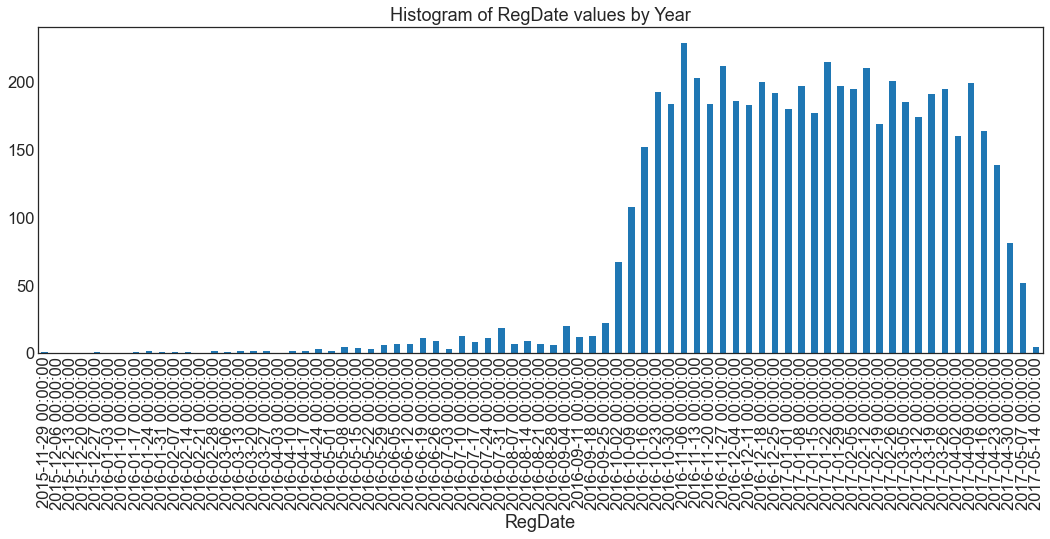

In [282]:
users_df.groupby(pd.Grouper(key='RegDate', freq='W')).size().plot.bar(figsize=(18,6), title='Histogram of RegDate values by Year')

Bulk of RegDate in period 2016-10-02 to 2017-05-07. 

#### DOB

In [283]:
print("Red Date (Min - Max):", users_df.DOB.min(),users_df.DOB.max())

Red Date (Min - Max): 1900-08-05 00:00:00 1999-01-23 00:00:00


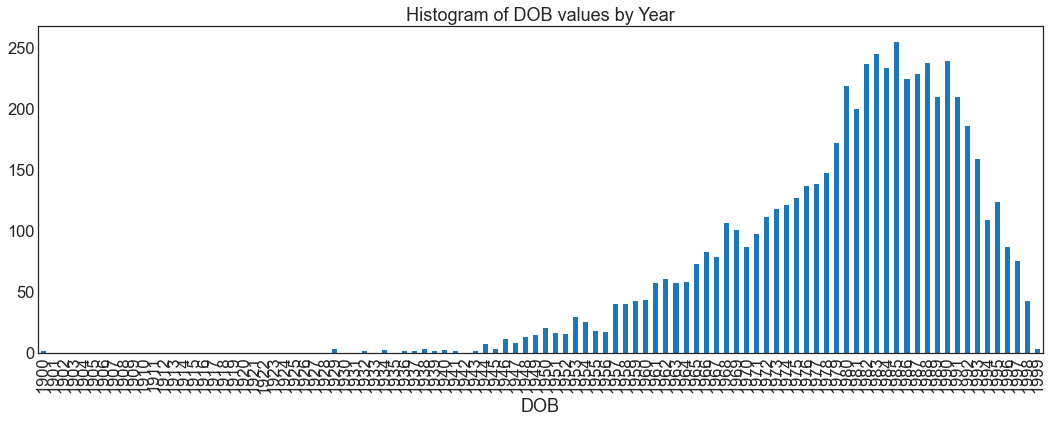

In [284]:
dob_by_year = users_df.groupby(pd.Grouper(key='DOB', freq='Y')).size().rename('count')
dob_by_year.index = dob_by_year.index.year
dob_by_year.sort_index().plot.bar(figsize=(18,6),title='Histogram of DOB values by Year');


In [285]:
users_df[users_df.DOB < '1920-01-01']

,UserId,Country,DOB,Gender,RegDate,Gender_corrected
833,3144147,GB,1900-08-05,F,2017-01-12,F


Is this an error in the data? This User would be 115 years old at the time of earliest registration date. Seems unlikely.

### Activities

In [286]:
activ_df=pd.read_csv("SIQ_data_test/activities.csv")
print(activ_df.shape)
activ_df.head()

(22642, 3)


,UserId,Date,Revenue
0,1326865,2017-02-19,17.05
1,1326865,2017-02-28,17.05
2,1326865,2017-03-06,17.16
3,1326865,2017-03-07,17.16
4,1326865,2017-03-08,17.16


Reload with setting some types

In [287]:
activ_df=pd.read_csv("SIQ_data_test/activities.csv", dtype={'UserId':str, 'Revenue':float}, parse_dates=['Date'])

#### UserId

In [288]:
print( f"{activ_df.UserId.isna().sum():,} missing values for UserId")
print( f"{activ_df.UserId.nunique():,} unique values for UserId")
print( f"{activ_df.UserId.duplicated().sum():,} duplicate values for UserId")

0 missing values for UserId
5,797 unique values for UserId
16,845 duplicate values for UserId


So mulitple 'activities' per user.

Cross check how many UserIds match UserIds in User data.

In [289]:
print(f"{len(set(users_df.UserId) & set(activ_df.UserId)):,} UserId in both Users and Activities.")
print(f"{len(set(users_df.UserId) - set(activ_df.UserId)):,} UserId in Users but not Activities.")
print(f"{len(set(activ_df.UserId) - set(users_df.UserId)):,} UserId in Activities but not Users.")


5,797 UserId in both Users and Activities.
10 UserId in Users but not Activities.
0 UserId in Activities but not Users.


So 10 users have no activities, be prepared in joining.

#### Date

In [290]:
print("Red Date (Min - Max):", activ_df.Date.min(),activ_df.Date.max())


Red Date (Min - Max): 2016-09-24 00:00:00 2017-10-01 00:00:00


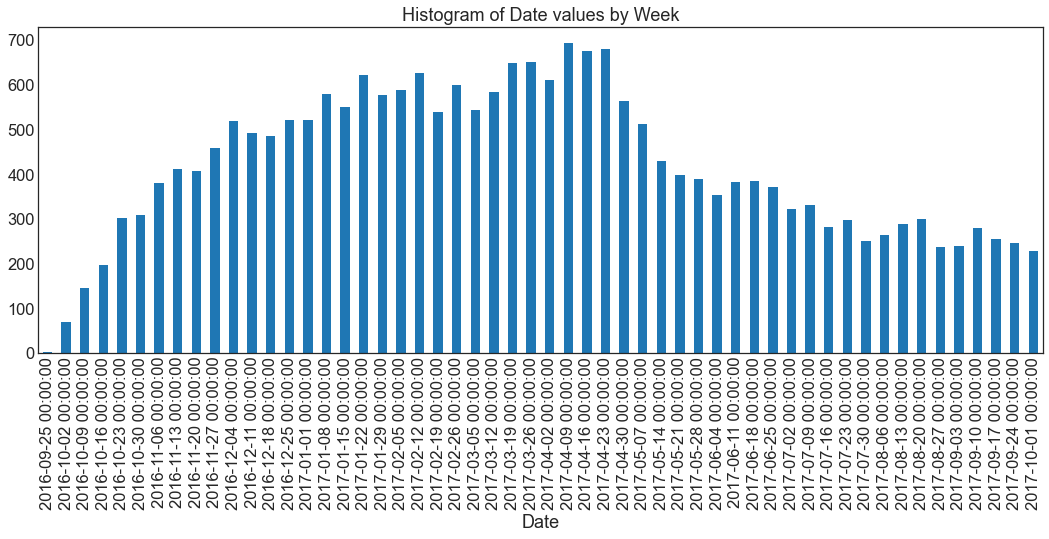

In [291]:
date_by_week = activ_df.groupby(pd.Grouper(key='Date', freq='W')).size().rename('count')
date_by_week.sort_index().plot.bar(figsize=(18,6),title='Histogram of Date values by Week');


#### Revenue

In [292]:
print( f"{activ_df.Revenue.isna().sum():,} missing values for Revenue")
print( f"Mean value = {activ_df.Revenue.mean():.1f}, Max = {activ_df.Revenue.max():.1f}, Min = {activ_df.Revenue.min():.1f}")
print( f"Median value = {activ_df.Revenue.median():.1f}")

0 missing values for Revenue
Mean value = 131.3, Max = 19000.0, Min = 11.0
Median value = 40.0


Text(0, 0.5, 'Count')

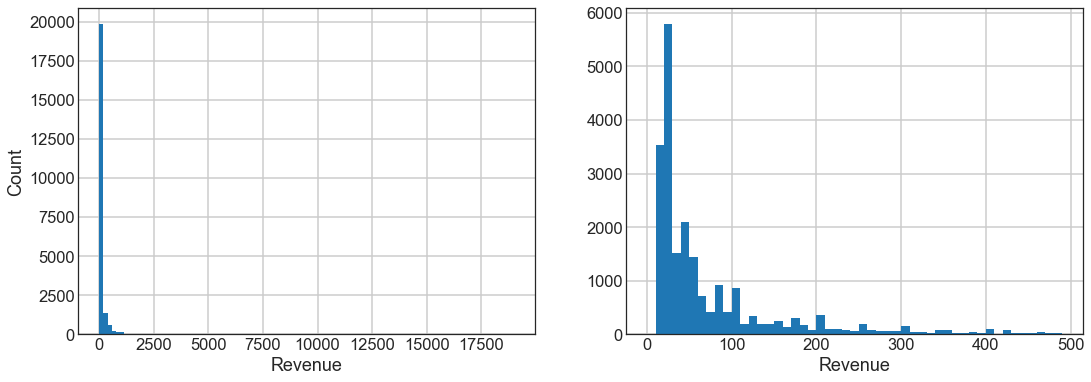

In [293]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
activ_df.Revenue.hist(bins=100,ax=ax[0]); ax[0].set_xlabel('Revenue'); ax[0].set_ylabel('Count')
activ_df.Revenue.hist(bins=range(0,500,10),ax=ax[1]); ax[1].set_xlabel('Revenue'); ax[0].set_ylabel('Count')

Looks like the value if 19000 is an outlier, most values < 500. Have a look at that distribution.

In [294]:
display(activ_df.Revenue.quantile([0.25,0.5,0.75,0.95]))

0.25     20.000
0.50     40.000
0.75    100.000
0.95    469.834
Name: Revenue, dtype: float64

In [295]:
display(pd.cut(activ_df.Revenue, bins=[0,500,1000,2000,3000,4000,5000,10000,20000]).value_counts())

(0, 500]          21666
(500, 1000]         602
(1000, 2000]        221
(2000, 3000]         79
(3000, 4000]         28
(5000, 10000]        19
(4000, 5000]         17
(10000, 20000]       10
Name: Revenue, dtype: int64

In [296]:
display(activ_df.merge(users_df,on='UserId').groupby('Country').Revenue.mean())

Country
DE        93.446874
FR       152.573858
GB       137.931935
Other     92.676633
US       160.093386
Name: Revenue, dtype: float64

In [297]:
tmp=activ_df.merge(users_df,on='UserId')
tmp[tmp.Revenue > 10000].groupby('Country').size()


Country
GB    9
US    1
dtype: int64

The Revenue data looks highly skewed. Don't know enough about the domain at this stage to know if these outliers are errors or real and therefore whether to remove them from the analysis.

## Question 3

Merge the two datasets and calculate the days since registration for each activity. What is the total mean and median revenue generated per user (ie across all activities)? How do you interpret the result?

In [298]:
df = activ_df.merge(users_df, on='UserId', how='left')
print(df.shape)
df.head()

(22642, 8)


,UserId,Date,Revenue,Country,DOB,Gender,RegDate,Gender_corrected
0,1326865,2017-02-19,17.05,DE,1988-05-04,M,2016-03-24,M
1,1326865,2017-02-28,17.05,DE,1988-05-04,M,2016-03-24,M
2,1326865,2017-03-06,17.16,DE,1988-05-04,M,2016-03-24,M
3,1326865,2017-03-07,17.16,DE,1988-05-04,M,2016-03-24,M
4,1326865,2017-03-08,17.16,DE,1988-05-04,M,2016-03-24,M


In [299]:
df['days_since_reg'] = ((df['Date'] - df['RegDate']) /pd.Timedelta('1D')).astype(int)
df.sample(10)

,UserId,Date,Revenue,Country,DOB,Gender,RegDate,Gender_corrected,days_since_reg
16134,3272415,2017-02-21,93.79,FR,1961-04-16,M,2017-02-21,M,0
21190,3328421,2017-05-04,70.00,GB,1970-12-17,,2017-04-04,M,30
20618,3321908,2017-01-27,62.17,DE,1964-11-14,,2016-11-25,M,63
20051,3319241,2017-01-08,30.00,GB,1988-02-09,F,2016-11-10,F,59
19343,3313207,2017-02-24,20.00,GB,1993-03-26,,2017-02-23,M,1
561,2459297,2017-03-22,17.09,US,1998-02-02,M,2016-09-24,M,179
16491,3277930,2017-06-22,100.00,GB,1980-06-11,,2017-03-22,M,92
16568,3278643,2017-04-13,30.00,GB,1972-12-09,M,2017-01-01,M,102
17912,3296860,2017-04-03,58.39,Other,1986-11-18,,2017-04-03,M,0
21523,3332022,2017-03-26,45.04,FR,1985-07-24,M,2016-12-02,M,114


#### The mean and median values for Revenue generated per user

First sum the total Revenue across all activities for each user then calculate average Revenue across all users.

In [300]:
rev_per_user = df.groupby('UserId').Revenue.sum()
print( f"Mean value = {rev_per_user.mean():.1f}")
print( f"Median value = {rev_per_user.median():.1f}")

Mean value = 512.7
Median value = 80.0


The mean value is much higher reflecting the influence of the skewed distribution / high values. In the initial EDA of the Activities data above we noted the presence of some large Revenue activities.

## Question 4

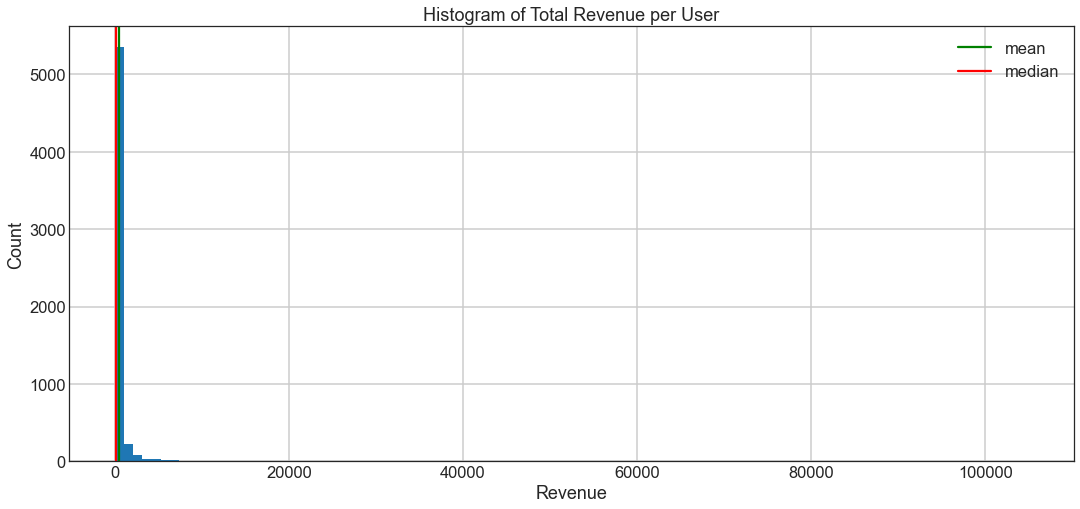

In [301]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
rev_per_user.hist(bins=100,ax=ax); ax.set_title("Histogram of Total Revenue per User"); ax.set_xlabel('Revenue'); ax.set_ylabel('Count')
ax.axvline(rev_per_user.mean(),c='g',label='mean'); ax.axvline(rev_per_user.median(),c='r',label='median'); ax.legend()


This plot on the left uses fixed number of bins to plot the histogram of revenues per user. Due to the presence of some large values of Revenue this means most users fall into the first bin and the plot is not useful for understanding the details of the distribution for most Users.

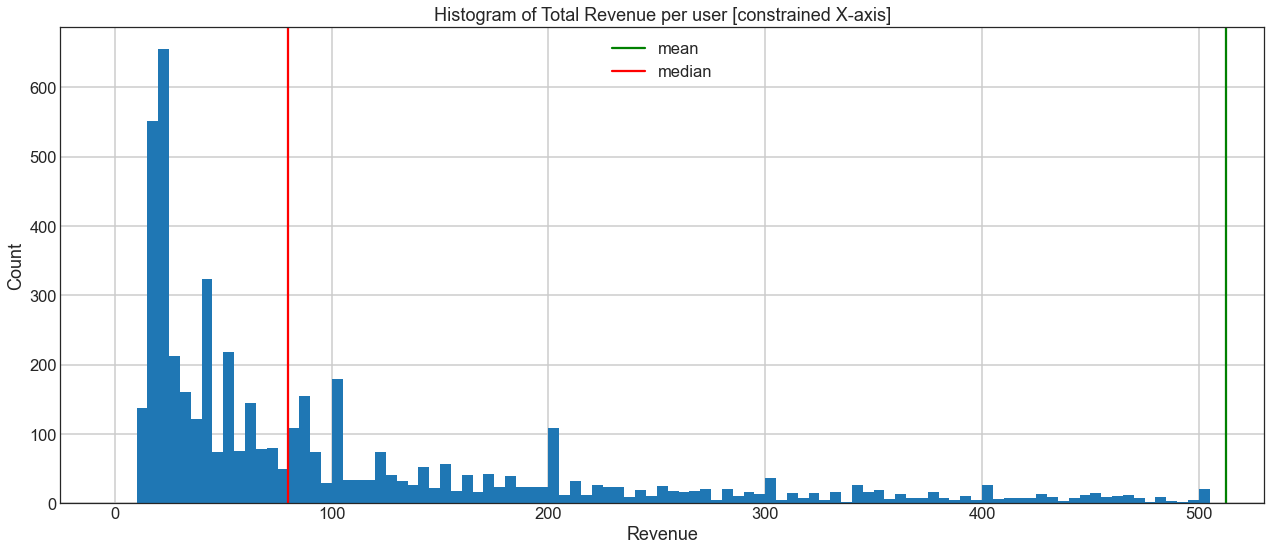

In [302]:
fig,ax = plt.subplots(1,1,figsize=(18,8))
rev_per_user.hist(bins=range(0,510,5),ax=ax); ax.set_title("Histogram of Total Revenue per user [constrained X-axis]"); ax.set_xlabel('Revenue'); ax.set_ylabel('Count');
ax.axvline(rev_per_user.mean(),c='g',label='mean'); ax.axvline(rev_per_user.median(),c='r',label='median'); ax.legend()
plt.tight_layout()

This plots the same data, but set the bins of the histogram to cover the range from zero to around the mean value to allow more details to be observed for typical users.

## Question 5

What is the average week 1 revenue, ie the revenue generated by the user in their first week (ie within the first 7 days since registration)?

So within 7 days = days_since_reg is 0 - 6

In [303]:
one_week_revenue = df[df.days_since_reg < 7].groupby('UserId').Revenue.sum()
display(one_week_revenue.agg([pd.Series.mean, pd.Series.median]))

mean      189.485308
median     50.000000
Name: Revenue, dtype: float64

# Question Block B: Analytics

### Question 6

In this dataset men generated a higher week 1 revenue than women, on average.  Is this difference in revenue between men and women statistically significant? What is an appropriate statistical test to determine this and what is it’s p-value?

Create 1 week revenue for males and females

In [304]:
one_week_revenue_male = df[(df.days_since_reg < 7) & (df.Gender_corrected=='M')].groupby('UserId').Revenue.sum()
one_week_revenue_female = df[(df.days_since_reg < 7) & (df.Gender_corrected=='F')].groupby('UserId').Revenue.sum()

print(f"mean male: {one_week_revenue_male.mean():.1f}, mean female: {one_week_revenue_female.mean():.1f}, diff: {one_week_revenue_male.mean() - one_week_revenue_female.mean():.1f}")


mean male: 195.8, mean female: 168.7, diff: 27.0


Note that the male sample is 3 x larger than female. Also check variances.

In [305]:
import numpy as np
V=[np.var(one_week_revenue_male), np.var(one_week_revenue_female)]
print(f"ratio of variances {max(V) / min(V):.1f}")
print(f"ratio of sample size {len(one_week_revenue_male) / len(one_week_revenue_female):.1f}")

ratio of variances 1.2
ratio of sample size 3.3


Even though the underlying distribution of revenue is highly skewed and far from normal, assume because of moderately large sample size a two-way t-test will still be a valid statisical test for comparing the means that characterise these distributions. Given the unbalanced sample sizes try student's t-test and Welch's T-test.

In [306]:
from scipy.stats import ttest_ind
print('t-test',ttest_ind(one_week_revenue_male, one_week_revenue_female,equal_var=True))
print('welch',ttest_ind(one_week_revenue_male, one_week_revenue_female,equal_var=False))


t-test Ttest_indResult(statistic=1.3222698130677804, pvalue=0.18613776888223235)
welch Ttest_indResult(statistic=1.3926675886364972, pvalue=0.16386646592630116)


So the p-value here is greater than > 0.05 so suggests that we cannot say that the difference in the means here is significant.

### Question 7

In which country is this difference biggest?

In [307]:
male_av_by_country = df[(df.days_since_reg < 7) & (df.Gender_corrected=='M')].groupby(['UserId','Country']).Revenue.sum().rename("Male").reset_index().groupby('Country').mean()
female_av_by_country = df[(df.days_since_reg < 7) & (df.Gender_corrected=='F')].groupby(['UserId','Country']).Revenue.sum().rename("Female").reset_index().groupby('Country').mean()

country_df=pd.concat([male_av_by_country,female_av_by_country],axis=1)
country_df['Difference'] = country_df['Male'] - country_df['Female']
country_df['Difference (% of Male)'] = 100*(country_df['Male'] - country_df['Female']) / country_df['Male']

country_df


,Male,Female,Difference,Difference (% of Male)
Country,,,,
DE,148.495754,115.478137,33.017618,22.234722
FR,251.761225,221.611875,30.149350,11.975375
GB,216.733151,213.170272,3.562879,1.643901
Other,151.148356,86.044233,65.104123,43.072995
US,196.196544,131.993529,64.203014,32.723825


The biggest difference in mean 1 week revenues between genders is for 'Other' countries.

In [308]:
df.groupby(['Country','Gender_corrected']).size().reset_index().pivot(index='Country',columns='Gender_corrected',values=0)

Gender_corrected,F,M
Country,,
DE,722,2298
FR,250,1515
GB,3758,6610
Other,1001,2091
US,1187,3210


Count of users per country by gender.

### Question 8

Please visualise the relationship between country, gender and week 1 revenue with an appropriate chart.


Due to low number of country categories in this case, try a bar chart.

Text(0.5, 1.0, 'Comparing mean 1 week revenue for Males and Females by Country')

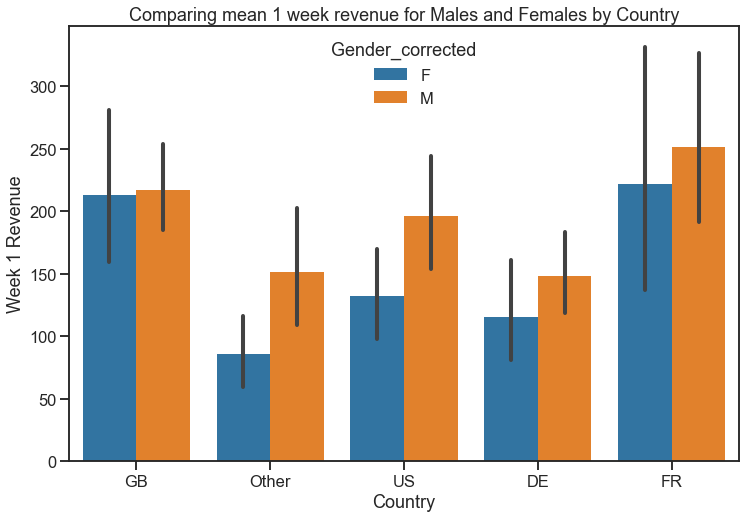

In [309]:
M=df[(df.days_since_reg < 7)].groupby(['UserId','Gender_corrected','Country']).Revenue.sum().rename('Week 1 Revenue').reset_index()
M.groupby(['Gender_corrected','Country']).mean().reset_index()#.pivot(index='Country',columns='Gender_corrected',values='Week 1 Revenue')

import seaborn as sns
sns.set_context('talk')
fig,ax=plt.subplots(1,1,figsize=(12,8))
sns.barplot(data=M,x='Country',y='Week 1 Revenue',hue='Gender_corrected',ax=ax)
ax.set_title('Comparing mean 1 week revenue for Males and Females by Country')

### Question 9

Build a linear regression model to predict the week 1 revenue of a user based on the following variables: Gender, Age, Country and day 1 revenue (ie the revenue generated by the user on their registration date). Which of these variables have a statistically significant predictive power according to this model?

Create age in years column

In [310]:
from datetime import datetime
users_df['Age_years'] = ((datetime.today() - users_df['DOB']) / pd.Timedelta(365.25,'D')).round().astype(int)
users_df['Age_years_N']=users_df['Age_years']/users_df['Age_years'].mean()


Use sklearn Linear Regression. One hot code the catgeorical/non-numerical columns of Country and Gender.

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

categorical_columns = ["Country", "Gender_corrected"]
numerical_columns = ["Age_years", "day_1_rev", "wk_1_rev"]

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
model = make_pipeline(
    preprocessor,
    LinearRegression()
)


Prepare the data set by calculating the day 1 revenue and first week revenue per user. Split into a training and test set.

In [320]:
def prep_data_set(d, users, exclude_rev_thresh=None):
    if exclude_rev_thresh is not None:
        d=d[d.Revenue < exclude_rev_thresh]
    
    rev = df[(df.days_since_reg < 1) ].groupby('UserId').Revenue.sum().rename('day_1_rev')
    rev2 = df[(df.days_since_reg < 7)  ].groupby('UserId').Revenue.sum().rename('wk_1_rev')
    R = pd.concat([rev,rev2],axis=1).fillna(0).reset_index()
    R = R.merge(users_df[['UserId','Age_years','Country','Gender_corrected']])
    return R

R=prep_data_set(df, users_df, exclude_rev_thresh=500) 
X = R[['Age_years','Country','Gender_corrected','day_1_rev']]
Y = R['wk_1_rev']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
X_train, y_train
model.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country',
                                                   'Gender_corrected'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

Use this technique to understand relative coefficient importance https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html 

,Coefficient importance
Gender_corrected_M,-21.418860
Country_DE,-13.817597
Country_US,-5.727753
Country_FR,-4.900734
Age_years,5.436278
Country_Other,9.900708
Country_GB,21.342658
Gender_corrected_F,21.418860
day_1_rev,401.879177


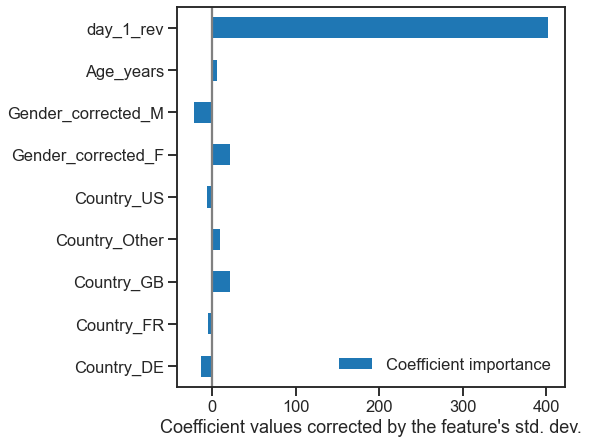

In [322]:
feature_names = model[:-1].get_feature_names_out()
X_train_preprocessed = pd.DataFrame( model[:-1].transform(X_train), columns=feature_names)

coefs = pd.DataFrame(
    model[-1].coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
display(coefs.sort_values(by='Coefficient importance'))
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

From this it looks like Day 1 revenue is the strongest predictor of week 1 revenue. Dig into this a little further.

**Alternative approach use statsmodels summary output**

In [314]:
import statsmodels.api as sm

lmdata = pd.concat([X,Y],axis=1)

lmdata

model_lin = sm.OLS.from_formula("wk_1_rev ~ day_1_rev + Age_years + Gender_corrected + Country", data=lmdata)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               wk_1_rev   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     916.5
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        16:15:37   Log-Likelihood:                -37824.
No. Observations:                5089   AIC:                         7.566e+04
Df Residuals:                    5081   BIC:                         7.572e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -13.5065     30.014     -0.450      0.653     -72.346      45.333
Gender_corrected[T.M]     1.4008     13.885      0.101      0.920     -25.820      28.622
Country[T.FR]            36.6395     24.593      1.490      0.136     -11.573      84.852
Country[T.GB]            23.1933     16.630      1.395      0.163      -9.409      55.796
Country[T.Other]          8.0122     21.276      0.377      0.706     -33.697      49.721
Country[T.US]             8.4986     19.580      0.434      0.664     -29.886      46.883
day_1_rev                 1.3405      0.017     79.720      0.000       1.308       1.373
Age_years                 0.9709      0.515      1.886      0.059      -0.038       1.980
==============================================================================
Omnibus:                     9485.131   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22204663.826
Skew:                          13.805   Prob(JB):                         0.00
Kurtosis:                     325.422   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this summary table:

 - "Day 1 Revenue" looks to be statistically significant predictor of week 1 revenue given P value < 0.05.
 - "Age_years" is close to passing that threshold.
 

<AxesSubplot:xlabel='wk_1_rev'>

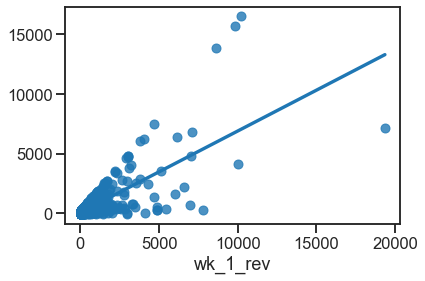

In [323]:
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions, ci=None) 

### Question 10

What revenues do you expect women from France, Germany and the UK to generate, assuming they are all aged 40 and all generated £20 on their registration day?

Take only Day 1 revenue and Age as signifcant predictions. Use model coefficients for these variables and simply calculate an estimate.

$$ pred = (1.3405 * day_1_revenue) + (0.972 * Age_years) - 13.5811 $$


In [194]:
pred =  (1.3405 * 20) + (0.972 * 40) - 13.5811
pred

52.1089

To sanity check this then filter the source data to observations that roughly fit the above criteria

In [225]:
S=R[(R.day_1_rev==20) & (R.Age_years>=39)& (R.Age_years<=41)].wk_1_rev
print(f"""
    n_samples: {len(S)}
    mean wk1: {S.mean()}
    median wk1: {S.median()}
    min wk1: {S.min()}
    max wk1: {S.max()}
    std wk1: {S.std()}
    """)



    n_samples: 67
    mean wk1: 51.0
    median wk1: 20.0
    min wk1: 20.0
    max wk1: 673.0
    std wk1: 92.27084637581412
    


The predicted value seems consisent with similar observations

Concerned about the skewed data of revenue and linear model. Given more time I would likely investigate the effect of transforming the revenue data, maybe logarithmic scaling.